# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [59]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [60]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saudarkrokur
Processing Record 2 of Set 1 | gongchangling
Processing Record 3 of Set 1 | taroa
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | shubarshi
Processing Record 9 of Set 1 | sao vicente
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | susuman
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | farafangana
Processing Record 14 of Set 1 | baotou
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | kiunga
Processing Record 20 of Set 1 | lys'va
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1 | laguna
Processing Record 23 of Set 1 | ri

In [61]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [62]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saudarkrokur,65.7461,-19.6394,12.70,70,90,3.70,IS,1722810134
1,gongchangling,41.1167,123.4500,23.98,98,98,2.28,CN,1722810134
2,taroa,8.7058,171.2275,28.44,78,92,6.19,MH,1722810134
3,constantia,44.1833,28.6500,19.38,65,14,6.23,RO,1722810135
4,anadyr,64.7500,177.4833,5.28,100,100,8.00,RU,1722810135


In [63]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [64]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saudarkrokur,65.7461,-19.6394,12.70,70,90,3.70,IS,1722810134
1,gongchangling,41.1167,123.4500,23.98,98,98,2.28,CN,1722810134
2,taroa,8.7058,171.2275,28.44,78,92,6.19,MH,1722810134
3,constantia,44.1833,28.6500,19.38,65,14,6.23,RO,1722810135
4,anadyr,64.7500,177.4833,5.28,100,100,8.00,RU,1722810135


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

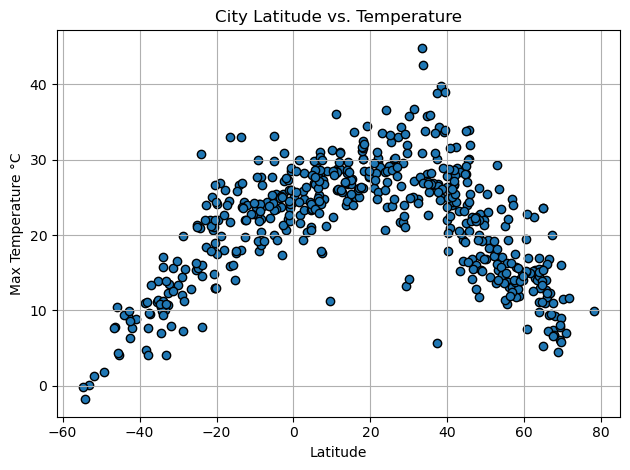

In [132]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/City_Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

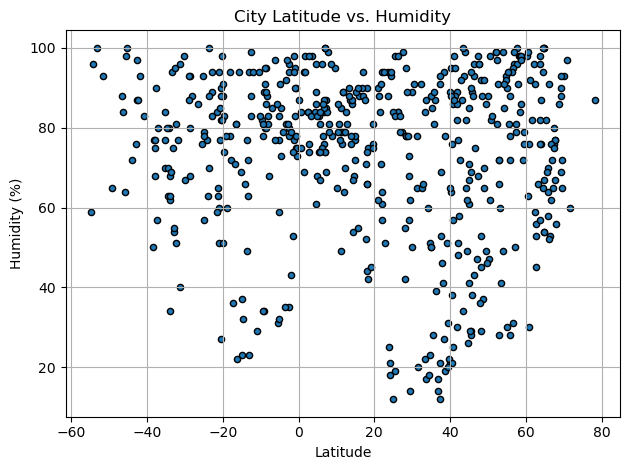

In [133]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/City_Lat_vs_Hum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

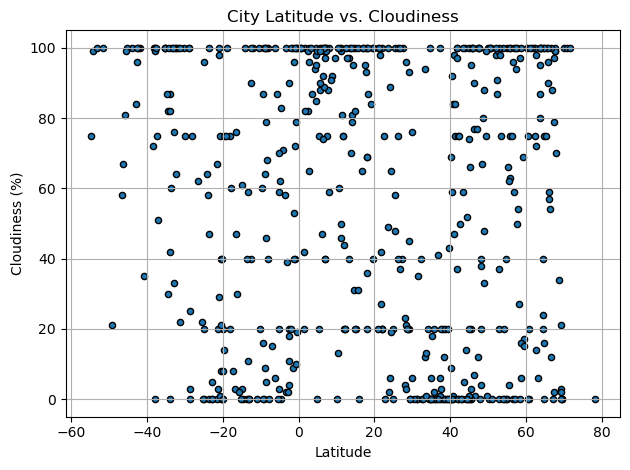

In [134]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/City_Lat_vs_Cld.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

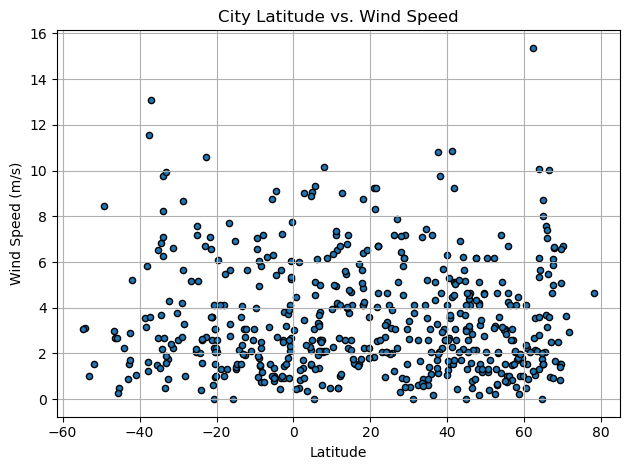

In [135]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/City_Lat_vs_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [136]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saudarkrokur,65.7461,-19.6394,12.70,70,90,3.70,IS,1722810134
1,gongchangling,41.1167,123.4500,23.98,98,98,2.28,CN,1722810134
2,taroa,8.7058,171.2275,28.44,78,92,6.19,MH,1722810134
3,constantia,44.1833,28.6500,19.38,65,14,6.23,RO,1722810135
4,anadyr,64.7500,177.4833,5.28,100,100,8.00,RU,1722810135


In [137]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,blackmans bay,-43.0167,147.3167,9.29,76,84,0.89,AU,1722810135
8,sao vicente,-23.9631,-46.3919,30.71,63,58,0.42,BR,1722810135
9,grytviken,-54.2811,-36.5092,-1.78,96,99,3.12,GS,1722810136
11,hermanus,-34.4187,19.2345,10.44,63,82,6.85,ZA,1722809947
12,farafangana,-22.8167,47.8333,18.46,89,5,2.72,MG,1722810136


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.24x + 31.5


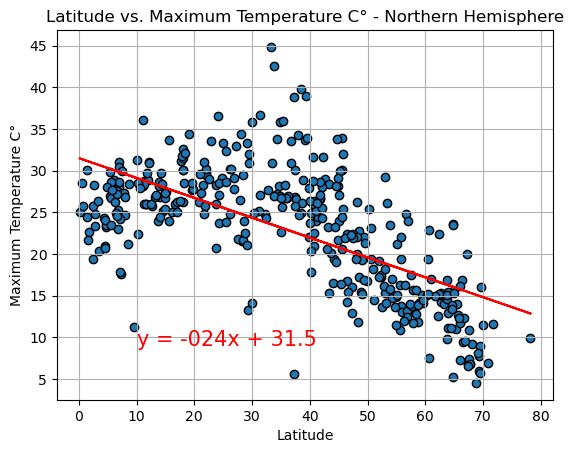

In [138]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
  
plt.text(10, 9, "y = -024x + 31.5", size=15, color='r')
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.45x + 27.53


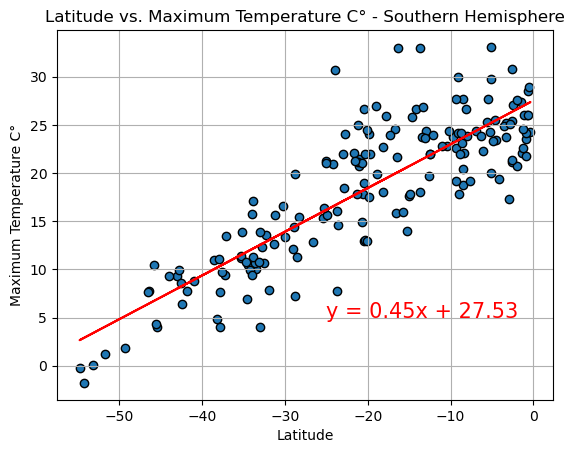

In [139]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.text(-25, 5, "y = 0.45x + 27.53", size=15, color='r')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The higher temperatures occur about 20 - 40 degrees on either side of the equator. Right on the equator does not seem to be the hottest areas surprisingly.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = -0.08x + 75.15


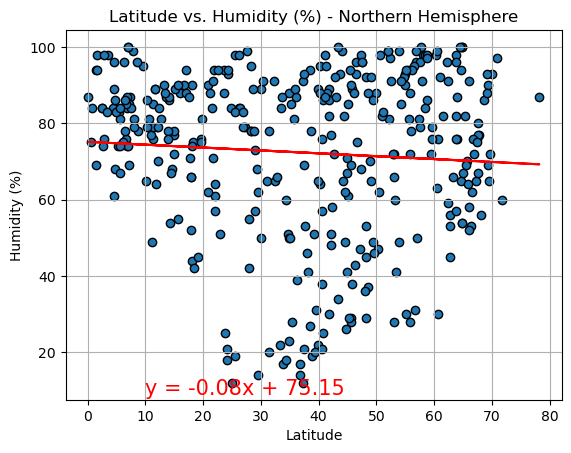

In [140]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.text(10, 9, "y = -0.08x + 75.15", size=15, color='r')

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.08x + 73.74


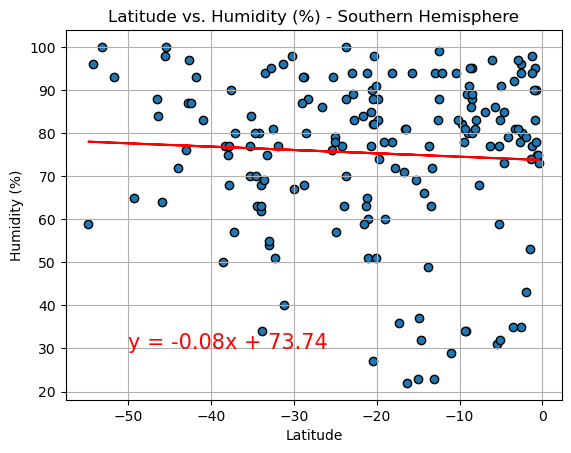

In [141]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.text(-50,30, "y = -0.08x + 73.74", size=15, color='r')

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere tends to be more humid than the Southern Hemisphere per the graphs above.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = -0.31x + 66.21


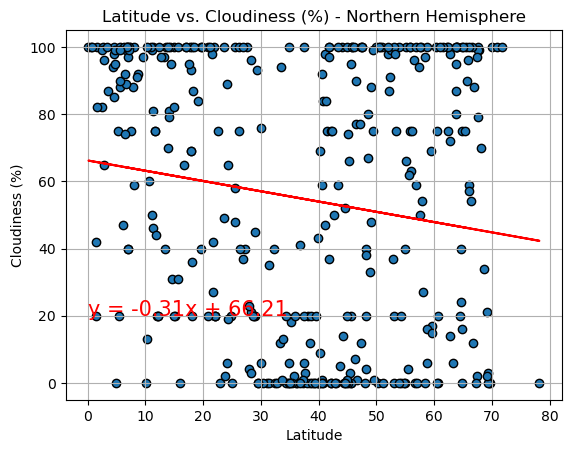

In [142]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.text(0,20, "y = -0.31x + 66.21", size=15, color='r')

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.8x + 37.03


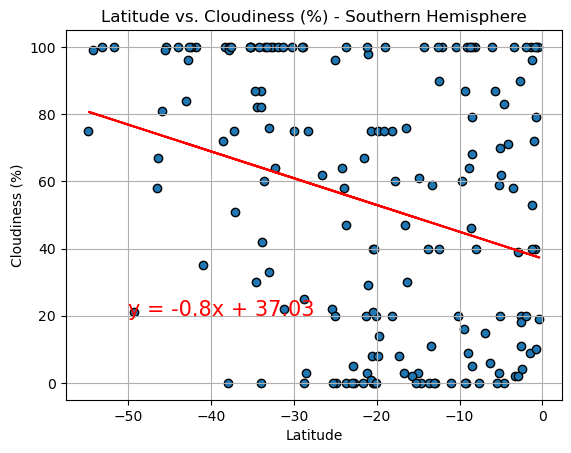

In [143]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.text(-50,20, "y = -0.8x + 37.03", size=15, color='r')

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The Northern hemisphere seems to be slightly cloudier overall than the Southern Hemisphere. This seems reasonable as the bulk of the Northern Hemisphere is land while the bulk of the Southern Hemisphere is water.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = -0.01x + 3.68


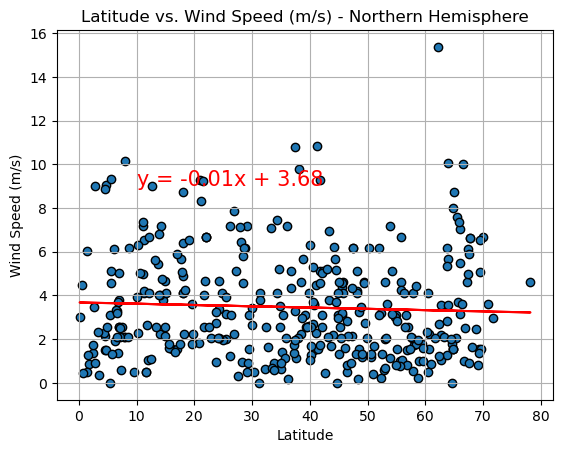

In [144]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.text(10, 9, "y = -0.01x + 3.68", size=15, color='r')

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.01x + 3.28


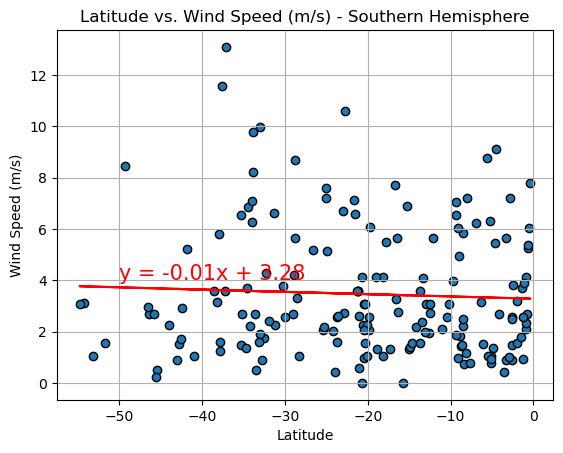

In [145]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.text(-50, 4,"y = -0.01x + 3.28", size=15, color='r')

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The majority of the Northern and Southern Hemisphere's have windspeeds below 4 miles per hour. The minority of cities has over four and the instances get rarer the higher speed on the graphs.